# Speak Italian

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import re
import numpy as np

dataset_path = 'dataset'

## Data Analysis

### Dataset

Merge all .csv files to create the dataset. Each of them contains the landmarks that represent the gestures made by the same user

In [3]:
df = pd.DataFrame()

for file in os.listdir(dataset_path):
    if file.endswith('csv'):
        df_tmp = pd.read_csv(os.path.join(dataset_path, file), index_col=0)
        df = pd.concat([df, df_tmp], ignore_index=True)

df.rename(columns={'class': 'label'}, inplace=True)
dataset = df
dataset

,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,THUMBJP_x,...,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z,label
0,1.000000,0.535698,-1.555923e-07,0.826567,0.217707,0.004134,0.515742,0.088783,-0.005884,0.226783,...,0.262985,1.000000,-0.094536,0.367338,0.994979,-0.081242,0.490450,0.948267,-0.068778,thumbUp_right
1,1.000000,0.604900,-4.790222e-07,0.841624,0.246173,0.002021,0.560724,0.047736,-0.009092,0.293134,...,0.286872,1.000000,-0.110365,0.404770,0.985375,-0.097917,0.516452,0.923164,-0.085541,thumbUp_right
2,1.000000,0.849029,-3.729000e-07,0.844900,0.603025,0.005090,0.626145,0.388289,-0.013972,0.539316,...,0.269569,1.000000,-0.124813,0.391081,0.999115,-0.109388,0.510905,0.973109,-0.095920,thumbUp_right
3,1.000000,0.854949,-4.384640e-07,0.821780,0.607058,0.011245,0.599499,0.388548,-0.004920,0.525598,...,0.295202,1.000000,-0.126208,0.410489,0.998659,-0.112932,0.524640,0.965124,-0.100723,thumbUp_right
4,1.000000,0.885415,-5.082885e-07,0.817770,0.629397,0.014541,0.598176,0.404478,0.000283,0.518998,...,0.266318,0.982659,-0.118345,0.370942,1.000000,-0.101977,0.483393,0.981080,-0.088872,thumbUp_right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.571649,1.000000,1.028679e-06,0.843927,0.867594,-0.030373,1.000000,0.661641,-0.045461,0.906074,...,0.308260,0.610246,-0.097192,0.446172,0.718371,-0.089472,0.468014,0.803578,-0.069165,peace_left
39996,0.569780,1.000000,1.008108e-06,0.853202,0.869555,-0.029428,1.000000,0.657461,-0.043349,0.890879,...,0.328833,0.613020,-0.097351,0.457048,0.723640,-0.090459,0.468489,0.809083,-0.071612,peace_left
39997,0.558809,1.000000,1.004944e-06,0.843705,0.874373,-0.030626,1.000000,0.667229,-0.044881,0.909949,...,0.321270,0.611245,-0.096511,0.443211,0.721393,-0.090504,0.455116,0.808830,-0.071634,peace_left
39998,0.566433,1.000000,1.020657e-06,0.842514,0.867705,-0.031161,1.000000,0.661045,-0.046789,0.894426,...,0.325405,0.611161,-0.100278,0.448020,0.722627,-0.093296,0.457905,0.809461,-0.073598,peace_left


All attributes in the dataset are numerical

* 40.000 total instances
* 63 features per instance (21 points in 3D space)

Split the whole dataset in X (data instances) and y (labels)

In [4]:
X, y = dataset.loc[:, ~dataset.columns.isin(['label'])], dataset['label']
n_samples = X.shape[0]
n_features = dataset.shape[1]
labels = list(y.unique())

In [ ]:
dataset.describe()

,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,THUMBJP_x,...,PINKY_MCP_z,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z
count,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.492526,0.890649,-6.400215e-09,0.487814,0.768803,-0.016971,0.484699,0.600083,-0.029961,0.487129,...,-0.048028,0.497330,0.509488,-0.065459,0.495245,0.518078,-0.057358,0.496304,0.510872,-0.046733
std,0.382229,0.240747,5.354025e-07,0.295019,0.169908,0.016787,0.314785,0.157886,0.021458,0.317281,...,0.028452,0.372863,0.328058,0.032431,0.331004,0.333207,0.035021,0.330684,0.359381,0.038365
min,0.000000,0.000000,-1.237358e-06,0.000000,0.114005,-0.081310,0.000000,0.000000,-0.131633,0.000000,...,-0.166516,0.000000,0.000000,-0.197845,0.000000,0.000000,-0.202784,0.000000,0.000000,-0.220696
25%,0.114131,0.905145,-4.171551e-07,0.222519,0.637567,-0.028121,0.201091,0.415474,-0.041689,0.184747,...,-0.064005,0.107623,0.287881,-0.088794,0.184551,0.239069,-0.082450,0.204642,0.154723,-0.071441
50%,0.481098,1.000000,-1.557508e-07,0.495956,0.860823,-0.017372,0.497523,0.657793,-0.028935,0.469382,...,-0.042850,0.499547,0.424600,-0.062537,0.479552,0.442641,-0.054378,0.487103,0.513966,-0.045794
75%,0.911295,1.000000,4.483064e-07,0.758828,0.898791,-0.005722,0.751249,0.719031,-0.016561,0.807783,...,-0.027705,0.879460,0.908116,-0.043197,0.813459,0.898604,-0.032227,0.770630,0.890490,-0.016683
max,1.000000,1.000000,1.662309e-06,1.000000,1.000000,0.080103,1.000000,1.000000,0.094243,1.000000,...,0.075918,1.000000,1.000000,0.106452,1.000000,1.000000,0.137856,1.000000,1.000000,0.145454


### Class Frequency (Histogram)

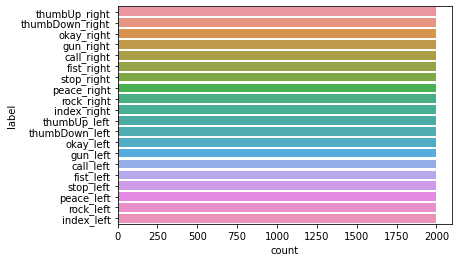

In [ ]:
import seaborn as sns

sns.countplot(data=dataset, y="label")
filename = 'countplot_'+str(len(labels))+'_classes.png'
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')

Dataset is perfectly banlanced:
* 10 Gestures
* 20 classes (for each gesture, 2 classes: one for right hand and one for left hand)
* 2000 instances for each class

### Data Visualization (Histogram)

Plot the histogram for each attribute to see the frequency of all possible values

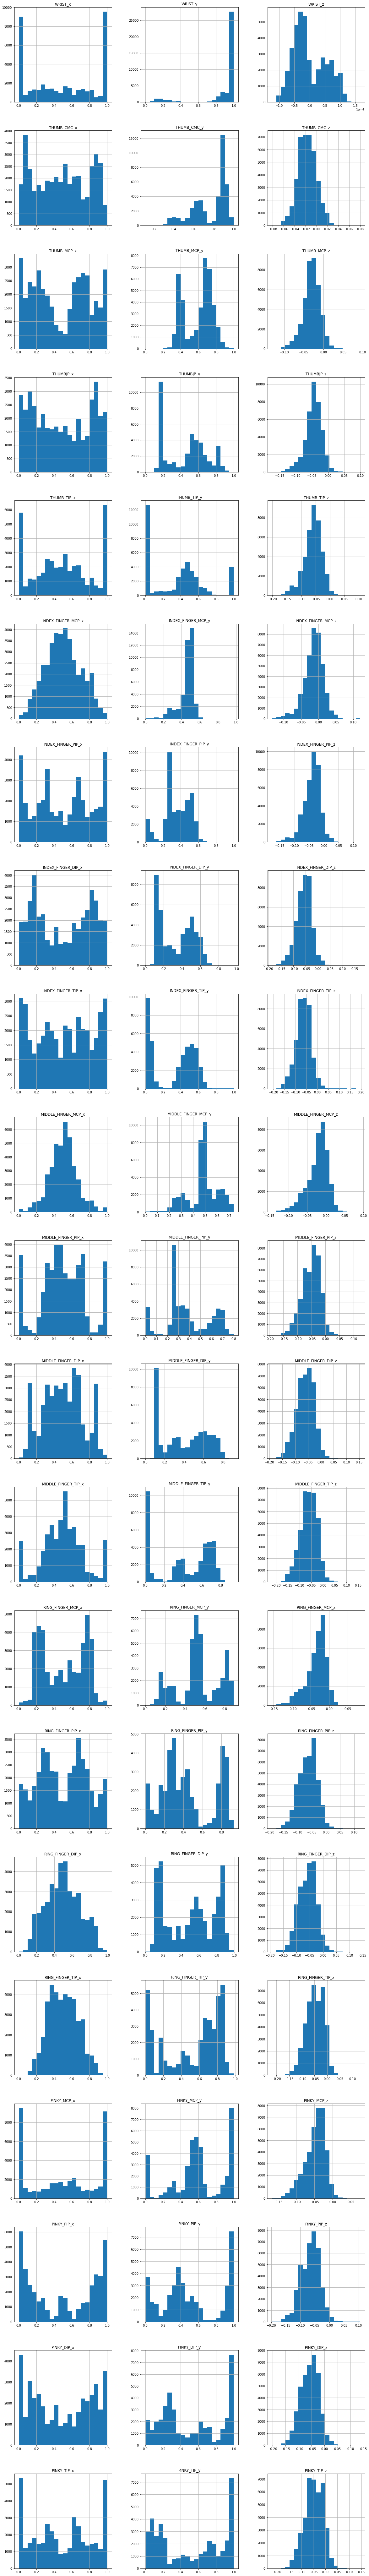

In [ ]:
X.hist(bins=20, figsize=(20,150), layout=(21,3));
filename = "histogram_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename)

Notice that all attributes that represent the z point of a landmark have similar behaviour among all gestures. Let's plot only those attributes to highlight this


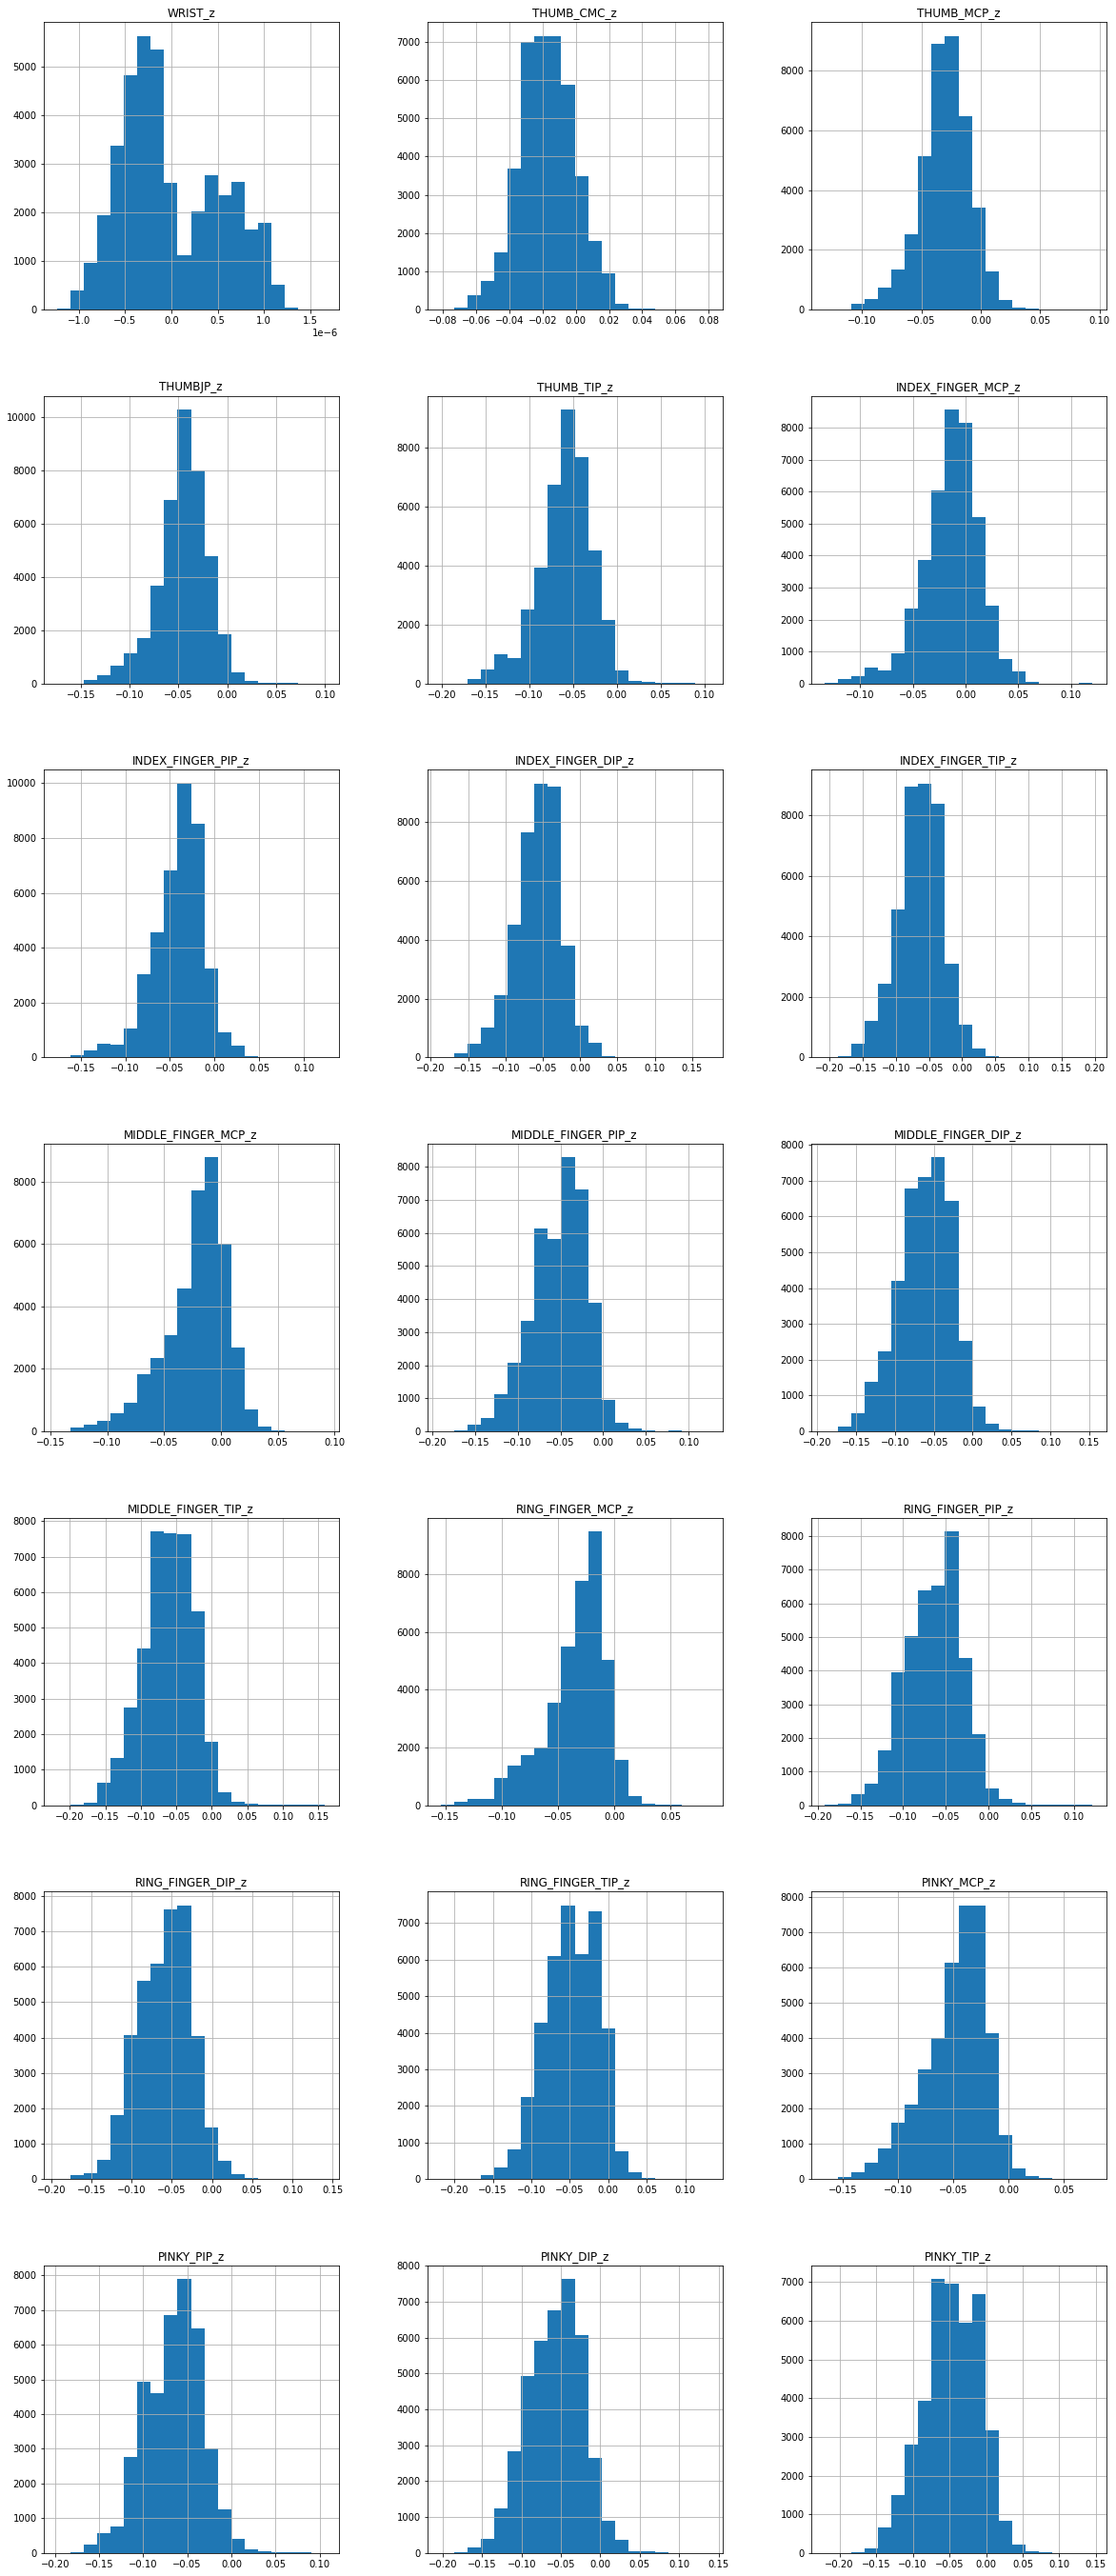

In [ ]:
X[[c for c in X.columns if c.endswith('z')]].hist(bins=20, figsize=(20,150), layout=(21,3));


filename = "z_histogram_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')

For all points the z-coordinate seems to follow the normal distribution. This suggests that they are less significant. Let's dimostrate this setting a low Variance Threshold.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

fsel = VarianceThreshold(threshold = 0.005)  # the attributes whose variance is greater than the threshold
fsel.fit_transform(X) # display just the first ten rows

X.columns[~fsel.get_support(indices=False)]

Index(['WRIST_z', 'THUMB_CMC_z', 'THUMB_MCP_z', 'THUMBJP_z', 'THUMB_TIP_z',
       'INDEX_FINGER_MCP_z', 'INDEX_FINGER_PIP_z', 'INDEX_FINGER_DIP_z',
       'INDEX_FINGER_TIP_z', 'MIDDLE_FINGER_MCP_z', 'MIDDLE_FINGER_PIP_z',
       'MIDDLE_FINGER_DIP_z', 'MIDDLE_FINGER_TIP_z', 'RING_FINGER_MCP_z',
       'RING_FINGER_PIP_z', 'RING_FINGER_DIP_z', 'RING_FINGER_TIP_z',
       'PINKY_MCP_z', 'PINKY_PIP_z', 'PINKY_DIP_z', 'PINKY_TIP_z'],
      dtype='object')

### Data Visualization (Boxplot)

In [ ]:
dataset.boxplot(column=list(X.columns), by='label', layout=(21,3), figsize=(50,400))
filename = "boxplot_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename)
plt.show()

### Dimensionality Reduction (PCA)

Use Principal Component Analysis to perform feature selection

In [45]:
from sklearn.decomposition import PCA
import pickle as pk


pca = PCA(n_components=0.95)
pca.fit(X.iloc[:32000])
X_reduced = pca.transform(X)
print("Number of components: ", X_reduced.shape[1])
print("Variance of components: ", pca.explained_variance_ratio_)

# save PCA for real-time demostration
filename = "pca_"+str(len(labels))+"_classes.pkl"
pk.dump(pca, open("model/"+filename, "wb"))

Number of components:  10
Variance of components:  [0.29328026 0.27960472 0.17227084 0.05425929 0.03835336 0.03216103
 0.02868152 0.02598667 0.01714394 0.01638081]


The PCA returns a set of 10 components

### Data Visualization after Dimensionality Reduction

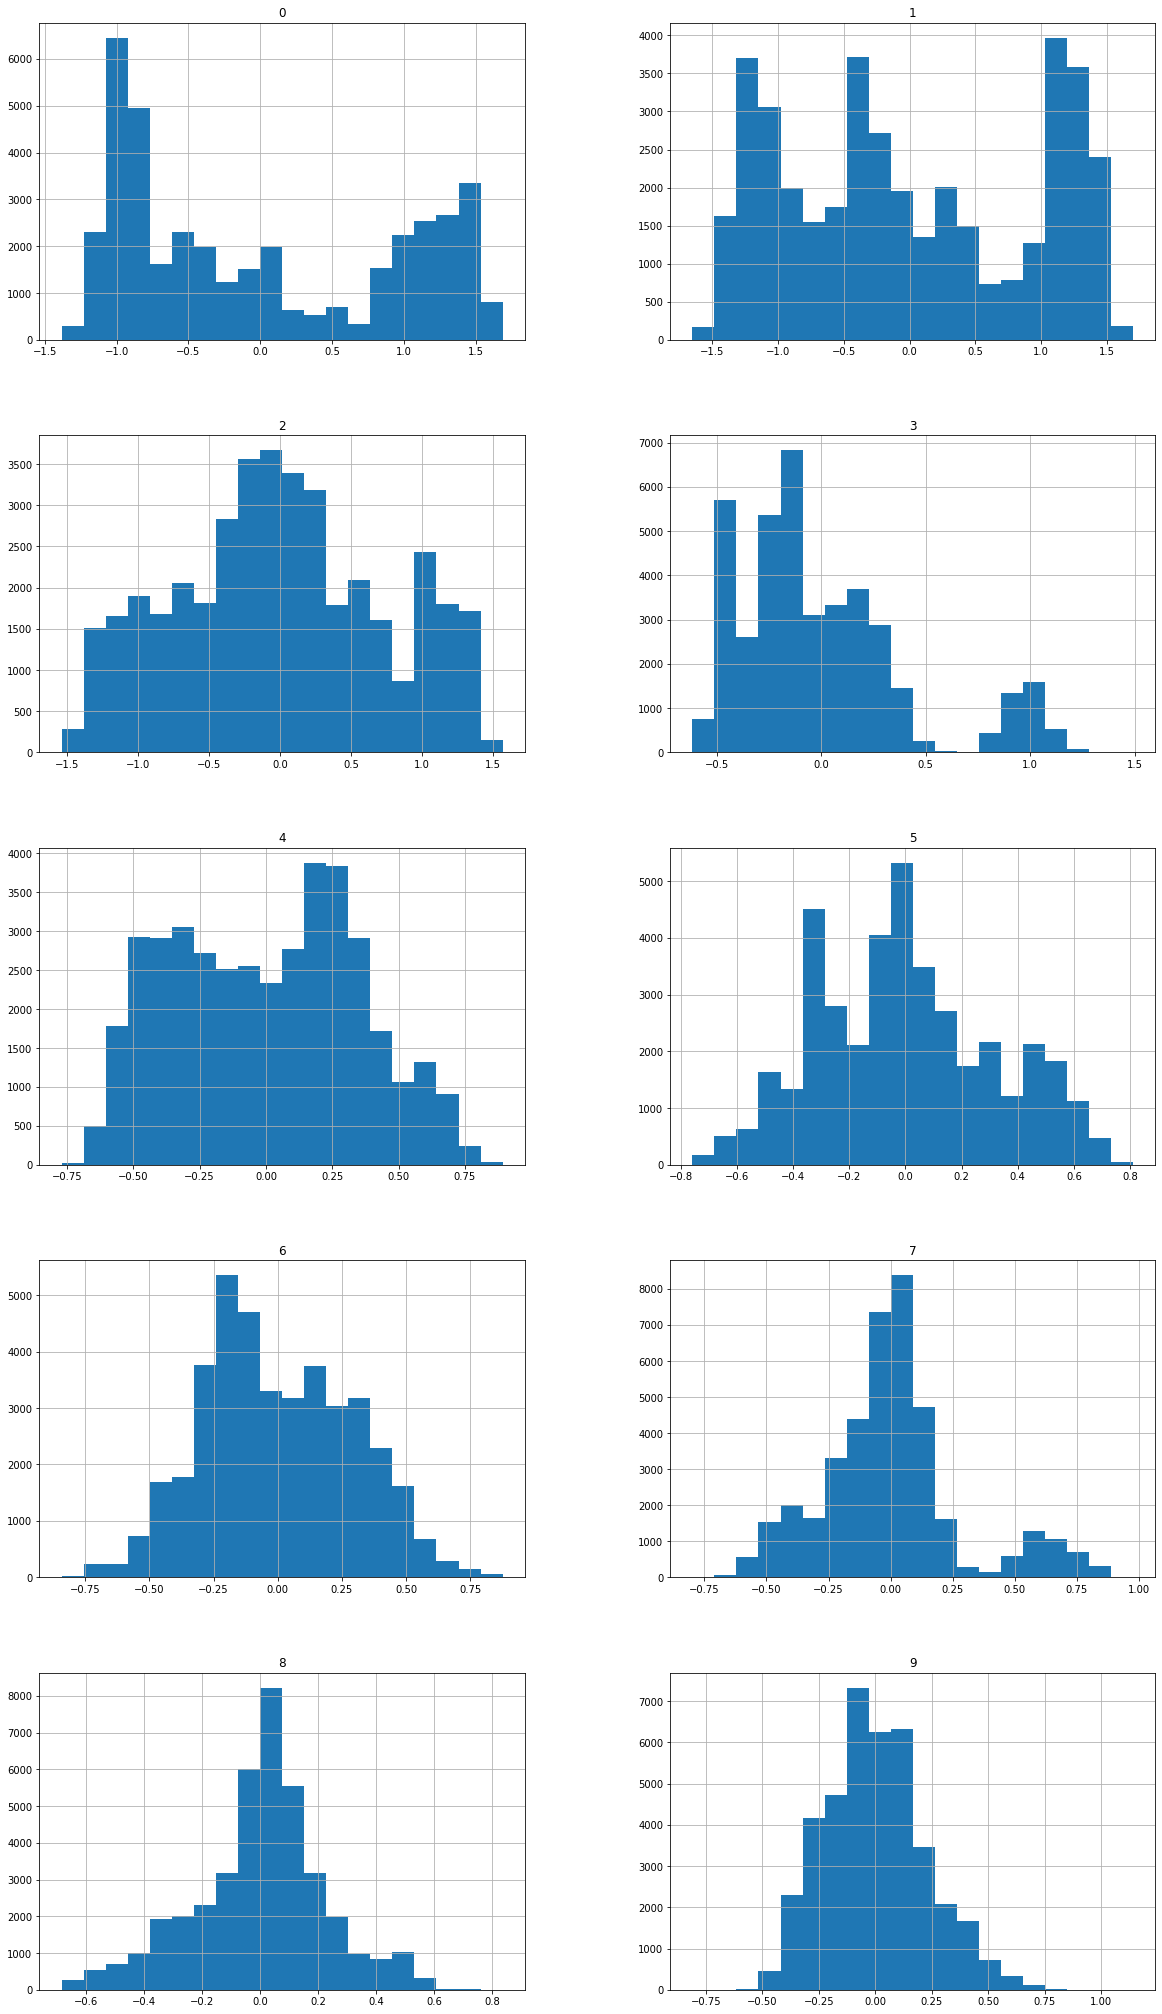

In [ ]:
pd.DataFrame(X_reduced).hist(bins=20, figsize=(20,150), layout=(20,2));

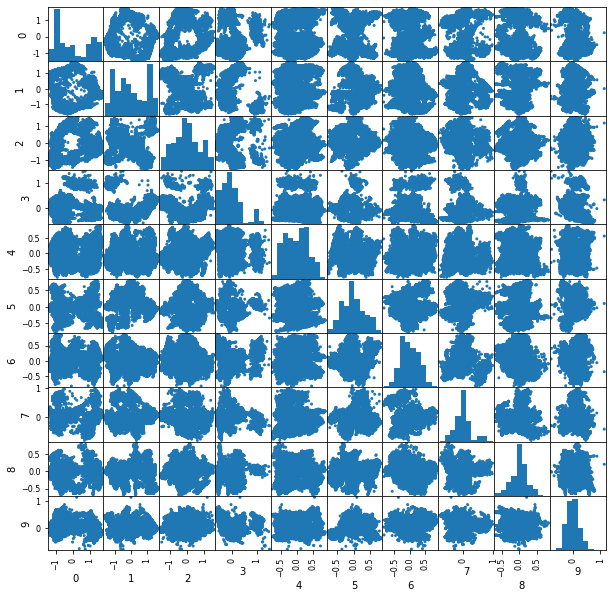

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(pd.DataFrame(X_reduced), alpha=1, figsize=(10,10))
filename = "scatter_matrix_pca"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

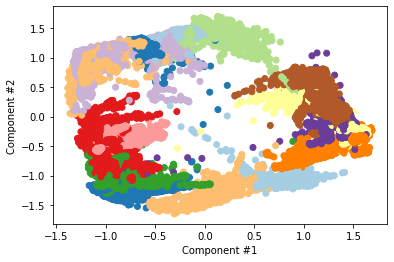

In [ ]:
mapping = {k:v for (k,v) in zip(labels, range(len(labels)))}
color = [mapping[gest] for gest in y.values]

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap='Paired')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
plt.show()

## Classification

### Train and Test a classifier (using StratifiedKFold validation)

Create a function that train a classifier using Stratified K-Fold Cross Validation. This function returns a dictionary that store the following information:
* average accuracy between each iteration
* average time for train and predict the test set
* a dataframe that contains average values for each iteration

In [44]:
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import pickle as pk

classifier_comparison = {}

def create_classifier(classifier, show=False, save=False):

    skf = StratifiedKFold(n_splits=5)

    pipe = make_pipeline(PCA(n_components=0.95), classifier)

    list_df = []
    list_accuracy = []
    list_times = {}
    training_time = []
    test_time = []
    cm = []

    k = 1

    for train, val in skf.split(X, y):

        # fit and predict using pipeline
        X_tr = X.iloc[train]
        y_tr = y.iloc[train]
        X_val = X.iloc[val]
        y_val = y.iloc[val]

        #train model
        start_time = time.time()
        pipe.fit(X_tr,y_tr)
        training_time.append(time.time() - start_time)

        #test model
        start_time = time.time()
        y_pred = pipe.predict(X_val)
        test_time.append(time.time() - start_time)

        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True)
        cm = confusion_matrix(y_val, y_pred)

        if show:
            print(f'FOLD {k}')
            print(classification_report(y_val,y_pred))
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        if show:
            display(df)
        list_df.append(df)
        k+=1

    elapsed_time = {}
    elapsed_time['train'] = np.mean(np.array(training_time))
    elapsed_time['test'] = np.mean(np.array(test_time))


    # compute average per-class metrics
    df_concat = pd.concat(list_df)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    df_avg = grouped_by_row_index.mean()

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)

    if save:
      filename = 'classifier_' + str(len(labels)) + '.sav'
      pk.dump(model, open('model/'+filename, 'wb'))

    return {'accuracy_avg': accuracy_avg, 'df_avg': df_avg, 'time_elapsed': elapsed_time, 'confusion_matrix': cm}



def display_confusion_matrix(matrix, filename):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.xticks(rotation=60)
    plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
    plt.show()

### kNN Hyperparameter Selection

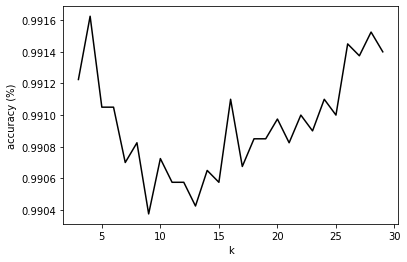

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_iterations = 10
range_k = range(3,30)
knn_comparison = {}
for k in range_k:
    model = KNeighborsClassifier(n_neighbors=k)
    knn_comparison[k] = create_classifier(model, save_dict=knn_comparison)

plt.plot(range_k, [knn_comparison[x]['accuracy_avg'] for x in range_k], color="k")  
plt.xlabel('k')
plt.ylabel('accuracy (%)')

filename = "comparison_kNN_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

### Random Forest Hyperparameter Selection

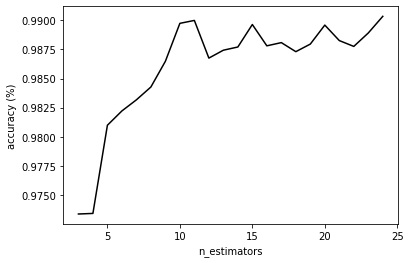

In [ ]:
from sklearn.ensemble import RandomForestClassifier

range_k = range(3, 25)
rf_comparison = {}
for k in range_k:
    model = RandomForestClassifier(n_estimators=k, random_state=0)
    rf_comparison[k] = create_classifier(model, save_dict=rf_comparison)

plt.plot(range_k, [rf_comparison[x]['accuracy_avg'] for x in range_k], color="k")  
plt.xlabel('n_estimators')
plt.ylabel('accuracy (%)')

filename = "comparison_RF_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

### Naive Bayesian Classifier

In [10]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
classifier_comparison[str(model)] = create_classifier(model, show=True)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

FOLD 1
                 precision    recall  f1-score   support

      call_left       1.00      1.00      1.00       400
     call_right       1.00      1.00      1.00       400
      fist_left       1.00      1.00      1.00       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      0.91      0.95       400
    index_right       1.00      1.00      1.00       400
      okay_left       1.00      1.00      1.00       400
     okay_right       1.00      0.99      1.00       400
     peace_left       0.92      1.00      0.96       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       0.99      1.00      1.00       400
 thumbDown_left       1

,call_left,call_right,fist_left,fist_right,gun_left,gun_right,index_left,index_right,okay_left,okay_right,...,rock_left,rock_right,stop_left,stop_right,thumbDown_left,thumbDown_right,thumbUp_left,thumbUp_right,macro avg,weighted avg
precision,1.000000,0.995025,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,...,1.0,1.0,1.0,0.992556,1.0,1.0,0.992556,1.000000,0.994649,0.994649
recall,0.997500,1.000000,1.0,1.0,0.995000,1.0,0.907500,0.997500,1.0,0.992500,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,0.995000,0.994250,0.994250
f1-score,0.998748,0.997506,1.0,1.0,0.997494,1.0,0.951507,0.998748,1.0,0.996236,...,1.0,1.0,1.0,0.996264,1.0,1.0,0.996264,0.997494,0.994240,0.994240
support,400.000000,400.000000,400.0,400.0,400.000000,400.0,400.000000,400.000000,400.0,400.000000,...,400.0,400.0,400.0,400.000000,400.0,400.0,400.000000,400.000000,8000.000000,8000.000000


FOLD 2
                 precision    recall  f1-score   support

      call_left       1.00      1.00      1.00       400
     call_right       1.00      0.97      0.98       400
      fist_left       0.98      0.97      0.97       400
     fist_right       0.96      1.00      0.98       400
       gun_left       1.00      1.00      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       0.99      0.99      0.99       400
    index_right       1.00      0.86      0.92       400
      okay_left       1.00      0.99      1.00       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      0.98      0.99       400
    peace_right       0.88      1.00      0.94       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

,call_left,call_right,fist_left,fist_right,gun_left,gun_right,index_left,index_right,okay_left,okay_right,...,rock_left,rock_right,stop_left,stop_right,thumbDown_left,thumbDown_right,thumbUp_left,thumbUp_right,macro avg,weighted avg
precision,1.000000,0.997436,0.979798,0.956835,1.0,1.000000,0.990025,1.000000,0.997494,1.0,...,1.000000,1.0,1.000000,1.0,1.000000,0.995025,0.995025,0.973236,0.988491,0.988491
recall,0.997500,0.972500,0.970000,0.997500,1.0,0.997500,0.992500,0.857500,0.995000,1.0,...,0.997500,1.0,0.997500,1.0,0.992500,1.000000,1.000000,1.000000,0.987625,0.987625
f1-score,0.998748,0.984810,0.974874,0.976744,1.0,0.998748,0.991261,0.923284,0.996245,1.0,...,0.998748,1.0,0.998748,1.0,0.996236,0.997506,0.997506,0.986436,0.987565,0.987565
support,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.0,...,400.000000,400.0,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,8000.000000,8000.000000


FOLD 3
                 precision    recall  f1-score   support

      call_left       0.99      1.00      0.99       400
     call_right       0.99      1.00      0.99       400
      fist_left       1.00      1.00      1.00       400
     fist_right       0.99      1.00      1.00       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      1.00      1.00       400
    index_right       0.99      0.99      0.99       400
      okay_left       1.00      1.00      1.00       400
     okay_right       0.85      1.00      0.92       400
     peace_left       1.00      1.00      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      0.82      0.90       400
 thumbDown_left       1

,call_left,call_right,fist_left,fist_right,gun_left,gun_right,index_left,index_right,okay_left,okay_right,...,rock_left,rock_right,stop_left,stop_right,thumbDown_left,thumbDown_right,thumbUp_left,thumbUp_right,macro avg,weighted avg
precision,0.985222,0.985222,0.997506,0.990099,1.000000,1.000000,1.000000,0.99,1.0,0.851064,...,1.0,1.0,1.0,1.00000,1.0,1.000000,0.997468,1.000000,0.989829,0.989829
recall,1.000000,1.000000,1.000000,1.000000,0.995000,0.997500,0.997500,0.99,1.0,1.000000,...,1.0,1.0,1.0,0.82500,1.0,0.997500,0.985000,0.982500,0.988500,0.988500
f1-score,0.992556,0.992556,0.998752,0.995025,0.997494,0.998748,0.998748,0.99,1.0,0.919540,...,1.0,1.0,1.0,0.90411,1.0,0.998748,0.991195,0.991173,0.988432,0.988432
support,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00,400.0,400.000000,...,400.0,400.0,400.0,400.00000,400.0,400.000000,400.000000,400.000000,8000.000000,8000.000000


FOLD 4
                 precision    recall  f1-score   support

      call_left       1.00      0.98      0.99       400
     call_right       0.93      0.96      0.95       400
      fist_left       0.98      0.99      0.98       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      0.99      1.00       400
     index_left       0.94      1.00      0.97       400
    index_right       0.94      0.98      0.96       400
      okay_left       0.95      0.99      0.97       400
     okay_right       1.00      0.97      0.99       400
     peace_left       1.00      1.00      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      0.87      0.93       400
     rock_right       1.00      0.96      0.98       400
      stop_left       0.99      1.00      0.99       400
     stop_right       0.97      1.00      0.99       400
 thumbDown_left       0

,call_left,call_right,fist_left,fist_right,gun_left,gun_right,index_left,index_right,okay_left,okay_right,...,rock_left,rock_right,stop_left,stop_right,thumbDown_left,thumbDown_right,thumbUp_left,thumbUp_right,macro avg,weighted avg
precision,1.000000,0.934307,0.980149,0.995025,1.000000,1.000000,0.938967,0.940334,0.947242,1.000000,...,1.000000,1.000000,0.987654,0.973236,0.990099,1.000000,0.975186,0.957071,0.980963,0.980963
recall,0.977500,0.960000,0.987500,1.000000,0.995000,0.992500,1.000000,0.985000,0.987500,0.972500,...,0.870000,0.957500,1.000000,1.000000,1.000000,0.992500,0.982500,0.947500,0.980375,0.980375
f1-score,0.988622,0.946979,0.983811,0.997506,0.997494,0.996236,0.968523,0.962149,0.966952,0.986058,...,0.930481,0.978289,0.993789,0.986436,0.995025,0.996236,0.978829,0.952261,0.980284,0.980284
support,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,8000.000000,8000.000000


FOLD 5
                 precision    recall  f1-score   support

      call_left       1.00      0.99      1.00       400
     call_right       1.00      1.00      1.00       400
      fist_left       1.00      1.00      1.00       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      1.00      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      1.00      1.00       400
    index_right       1.00      1.00      1.00       400
      okay_left       1.00      1.00      1.00       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      1.00      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

,call_left,call_right,fist_left,fist_right,gun_left,gun_right,index_left,index_right,okay_left,okay_right,...,rock_left,rock_right,stop_left,stop_right,thumbDown_left,thumbDown_right,thumbUp_left,thumbUp_right,macro avg,weighted avg
precision,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.997506,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.995025,1.0,0.999378,0.999378
recall,0.995000,1.0,1.0,1.0,0.997500,0.997500,1.0,1.000000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.999375,0.999375
f1-score,0.997494,1.0,1.0,1.0,0.998748,0.998748,1.0,0.998752,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.997506,1.0,0.999375,0.999375
support,400.000000,400.0,400.0,400.0,400.000000,400.000000,400.0,400.000000,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.000000,400.0,8000.000000,8000.000000


### Decision Tree Classifier

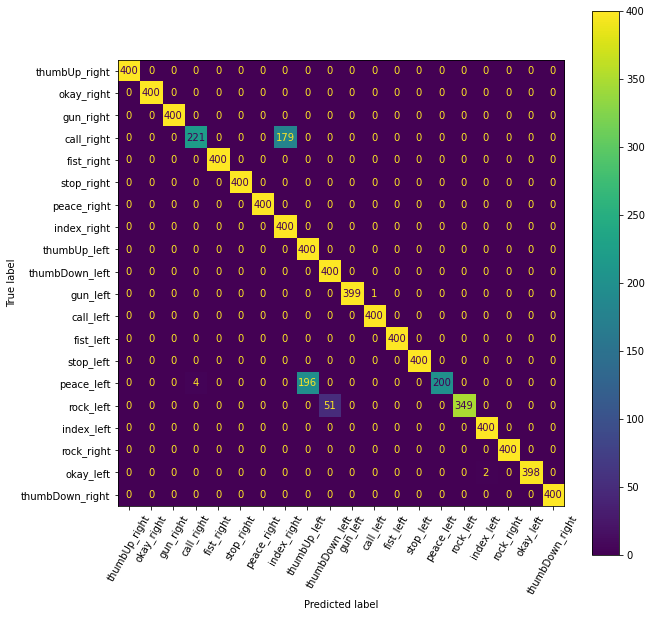

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Random Forest Classifier

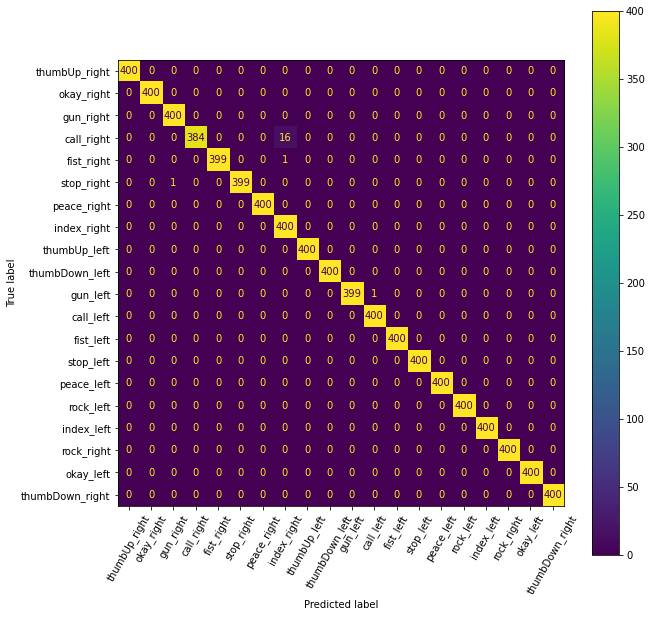

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=0)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### K-NN Classifier

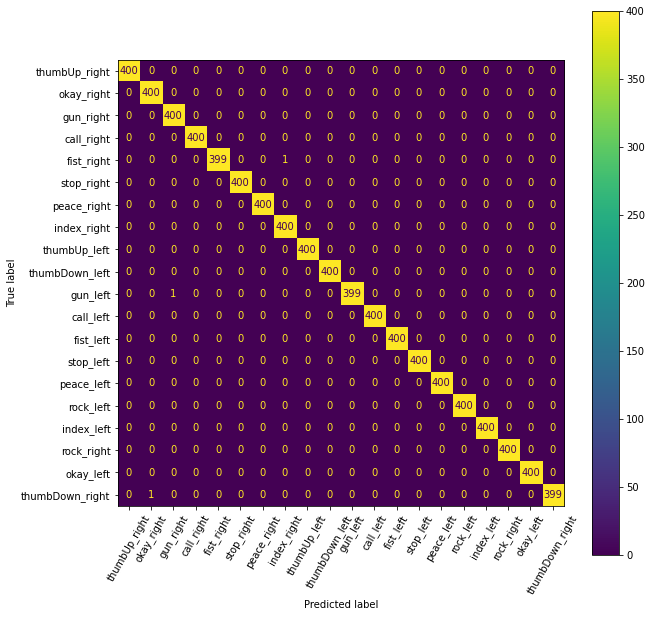

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Support Vector Classifier

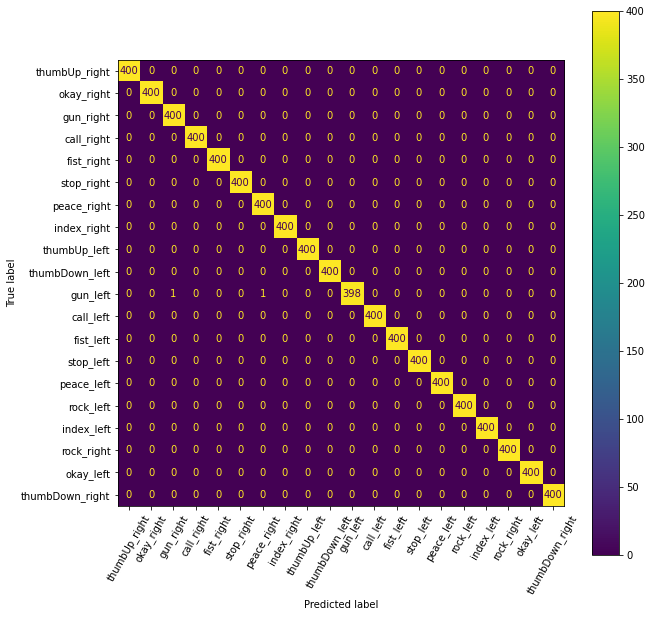

In [ ]:
from sklearn.svm import SVC

model = SVC()
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

## Comparison between Models

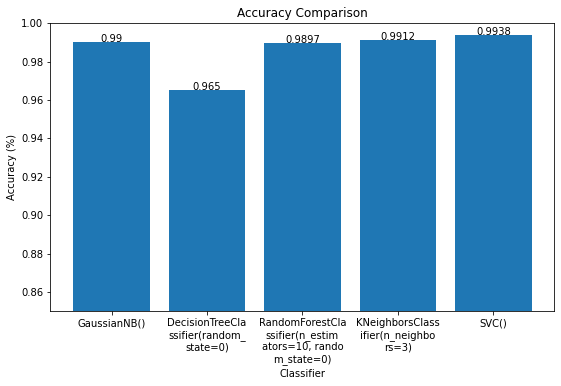

In [ ]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

avg_accuracies = [classifier_comparison[x]['accuracy_avg'] for x in classifier_comparison]
ax.bar(classifier_comparison.keys(), avg_accuracies)

plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")

for i in range(len(classifier_comparison.keys())):
    plt.text(i,avg_accuracies[i], round(avg_accuracies[i],4), ha= 'center')

plt.title('Accuracy Comparison')
#plt.grid()
plt.ylim([0.85, 1])

xticks = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in classifier_comparison.keys()]
plt.xticks(range(len(xticks)), xticks)
filename = "comparison_accuracy_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

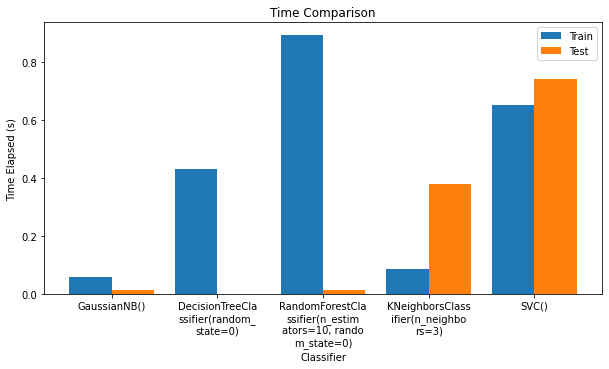

In [ ]:
trains = [classifier_comparison[x]['time_elapsed']['train'] for x in classifier_comparison]
tests = [classifier_comparison[x]['time_elapsed']['test'] for x in classifier_comparison]
  
X_axis = np.arange(len(classifier_comparison))

plt.figure(figsize=(10,5)) 

plt.bar(X_axis - 0.2, trains, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, tests, 0.4, label = 'Test')
  
xticks = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in classifier_comparison.keys()]
plt.xticks(range(len(xticks)), xticks)

plt.xlabel("Classifier")
plt.ylabel("Time Elapsed (s)")
plt.title('Time Comparison')
plt.legend()
filename = "comparison_time_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()